<a href="https://colab.research.google.com/github/Koushikgoud/Machine-Learning/blob/main/KNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All the code from here to beginning of the exercises is just a practice along of Classification topic (Chapter-3) in the book "Hands-on Machine Learning with Scikit-Learn, Keras and Tensor-Flow" and only difference is the usage of different digit image (4 in this case)

"as_frame = False" is used to force read the openml data as numpy.ndarray instead of pandas.DataFrame. This helps in following along with the textbook since data was read as numpy.ndarray when this book was composed.

In [1]:
!pip install sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) 
mnist.keys()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=b2f5dd000e80a3f53abc514e97ab346ab43c363668b3c14d9ab1b2ade90b51cf
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist['target']
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (70000, 784), y shape: (70000,)


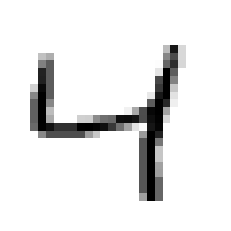

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [5]:
y[2]

'4'

In [6]:
import numpy as np
y = y.astype(np.uint8)
y[2]

4

In [7]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state = 42)
# X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_4)


SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

instead of using "sklearn.cross_validation" use "sklearn.model_selection"

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring = "accuracy")

array([0.9507 , 0.9626 , 0.98105])

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[52356,  1726],
       [  387,  5531]])

In [14]:
y_train_perfect = y_train_4
confusion_matrix(y_train_4, y_train_perfect)

array([[54082,     0],
       [    0,  5918]])

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision score: {precision_score(y_train_4, y_train_pred)}, Recall Score: {recall_score(y_train_4, y_train_pred)}")


Precision score: 0.7621606724541822, Recall Score: 0.9346062859074011


In [16]:
f1_score(y_train_4, y_train_pred)

0.8396204933586338

In [17]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2365.80619071])

In [18]:
threshold = 2366
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 3, method = "decision_function")

In [20]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

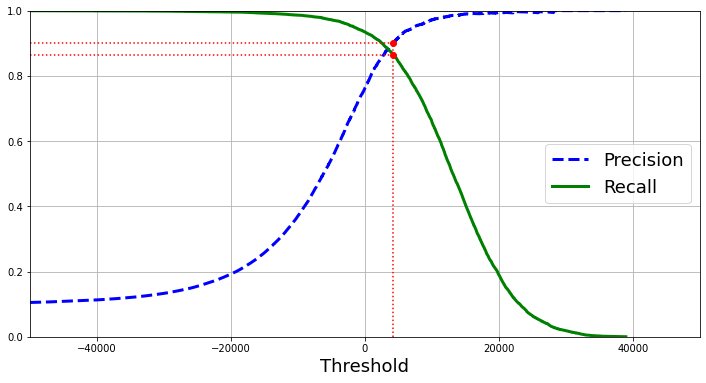

In [21]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth = 3)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth = 3)
  plt.xlabel("Threshold", fontsize = 18)
  plt.legend(loc='center right', fontsize = 18)
  plt.grid(True)
  plt.axis([-50000, 50000, 0, 1])


plt.figure(figsize=(12, 6))
recall_90_precision = recalls[np.argmax(precisions > 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions > 0.90)]
                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             

# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [22]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False,  True, False, ..., False, False, False])

In [23]:
precision_score(y_train_4, y_train_pred_90)

0.9000175716042875

In [24]:
recall_score(y_train_4, y_train_pred_90)

0.8654950996958432

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_4, y_scores)

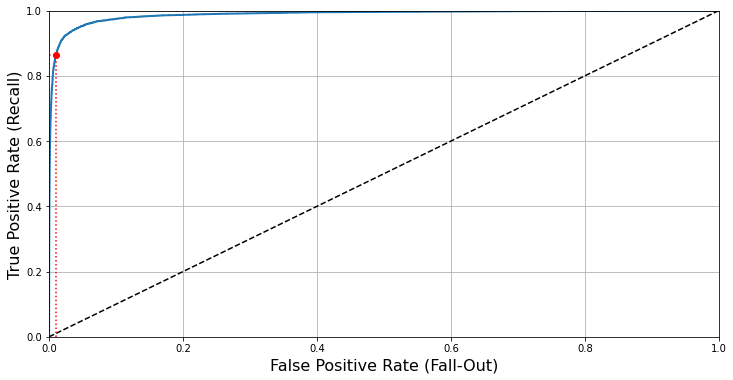

In [26]:
def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0, 1], [0, 1], "k--") 
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
  plt.grid(True)  
plt.figure(figsize=(12, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
plt.plot([fpr_90], [recall_90_precision], "ro")               
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4, y_scores)

0.9880345916585255

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_4, cv = 3, method = "predict_proba")

In [29]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_4, y_scores_forest)

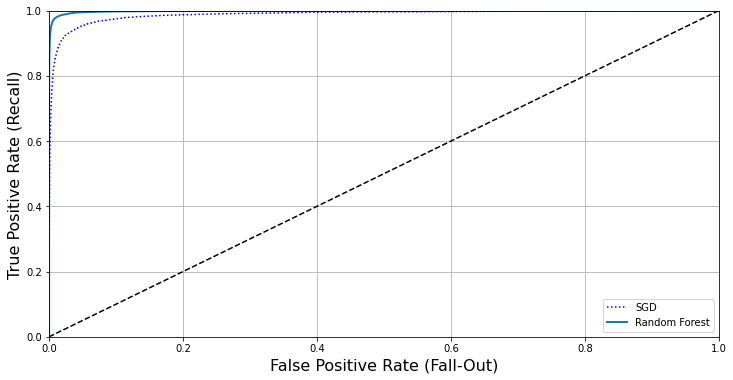

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [31]:
roc_auc_score(y_train_4, y_scores_forest)

0.9984570261730279

In [32]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([4], dtype=uint8)

In [33]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 0.71895638, -0.29862294,  5.22331511,  6.21126575,  9.30376987,
         3.83067518,  1.78946429,  7.25635001,  2.73070343,  8.26030778]])

In [34]:
np.argmax(some_digit_scores)

4

In [35]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [36]:
svm_clf.classes_[4]

4

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = "accuracy")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9071 , 0.90685, 0.9002 ])

In [38]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
y_train_pred

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([2, 4, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [40]:
conf_mx

array([[5621,    0,   15,   12,    9,   40,   40,    6,  175,    2],
       [   1, 6419,   44,   20,    3,   37,    7,   10,  172,   12],
       [  26,   27, 5349,   91,   73,   23,   60,   46,  311,   17],
       [  26,   19,  122, 5289,    1,  200,   29,   41,  318,   62],
       [  11,   16,   53,    5, 5321,    8,   40,   28,  244,  192],
       [  35,   17,   25,  160,   50, 4480,   93,   23,  414,   79],
       [  30,   17,   59,    1,   45,   92, 5540,   10,  121,    0],
       [  22,   19,   67,   26,   40,   12,    6, 5686,  113,  247],
       [  20,   63,   48,   96,    2,  133,   31,    6, 5403,   54],
       [  24,   19,   31,   59,  138,   35,    1,  174,  266, 5175]])

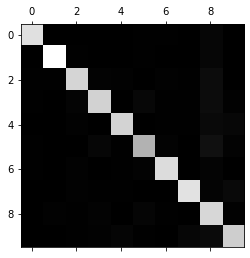

In [41]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [42]:
row_sums = conf_mx.sum(axis = 1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

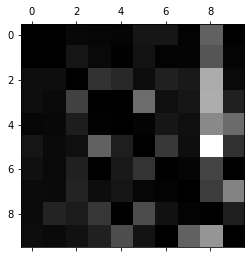

In [43]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap= plt.cm.gray)
plt.show()

In [44]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

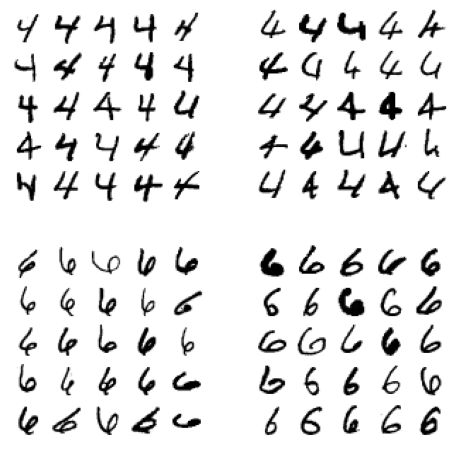

In [45]:
cl_a, cl_b = 4, 6
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [47]:
knn_clf.predict([some_digit])

array([[False, False]])

In [48]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976372022690897

0.976372022690897

In [49]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

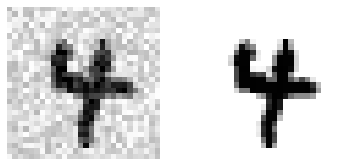

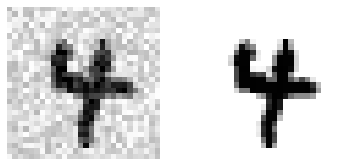

In [51]:
some_index = 1
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

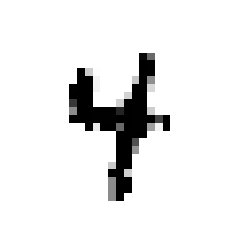

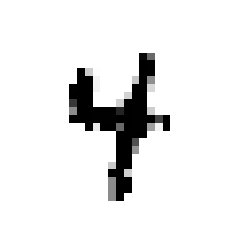

In [52]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

Exercise 1 
You can find code explanation in the read me file

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

In [54]:
# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [55]:
from sklearn.metrics import accuracy_score
print('Best hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy:', accuracy)

Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Test set accuracy: 0.973


Exercise 2
You can find code explanation in the read me file

In [56]:
def shift_image(image, direction):
    """Shift an MNIST image in the specified direction by one pixel"""
    image = image.reshape((28, 28))
    if direction == 'right':
        shifted = np.zeros((28, 28))
        shifted[:, 1:] = image[:, :-1]
    elif direction == 'left':
        shifted = np.zeros((28, 28))
        shifted[:, :-1] = image[:, 1:]
    elif direction == 'down':
        shifted = np.zeros((28, 28))
        shifted[1:, :] = image[:-1, :]
    elif direction == 'up':
        shifted = np.zeros((28, 28))
        shifted[:-1, :] = image[1:, :]
    else:
        raise ValueError('Invalid direction')
    return shifted.reshape((-1,))

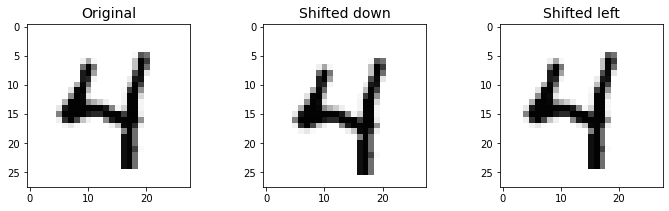

In [57]:
image = X_train[1003]
shifted_image_down = shift_image(image, 'down')
shifted_image_left = shift_image(image, 'left')

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [58]:
# Create shifted copies of the training set and add them to the training set
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
for image, label in zip(X_train, y_train):
    for direction in ['left', 'right', 'up', 'down']:
        shifted = shift_image(image, direction)
        X_train_augmented.append(shifted)
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [59]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [60]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [61]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [62]:
y_pred = knn_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.979


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Recall: {recall_score(y_test, y_pred, average="micro")} \nPrecision: {precision_score(y_test, y_pred, average="micro")} \nF1 Score: {f1_score(y_test, y_pred, average="micro")}')


Recall: 0.979 
Precision: 0.979 
F1 Score: 0.979
